In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
#Lets make a regression dataset
#n_samples is the number of data points, n_features is the number of features, n_informative is the number of informative features, n_targets is the number of target variables, noise is the standard deviation of the Gaussian noise applied to the output.
#random_state is used to seed the random number generator for reproducibility.
# This will generate a dataset with 4 samples, 1 feature, 1 informative feature, 1 target variable, and noise of 80.
X,y = make_regression(n_samples=4, n_features=1,n_informative=  1,n_targets=1,  noise=80, random_state=13)

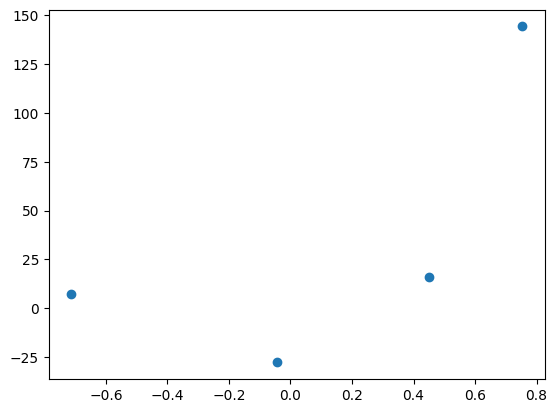

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)


In [4]:
#Now lets just find the intercept and slope for the line
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print("Intercept = ", reg.intercept_)
print("Slope = ", reg.coef_[0])

Intercept =  26.15963284313262
Slope =  78.35063667947497


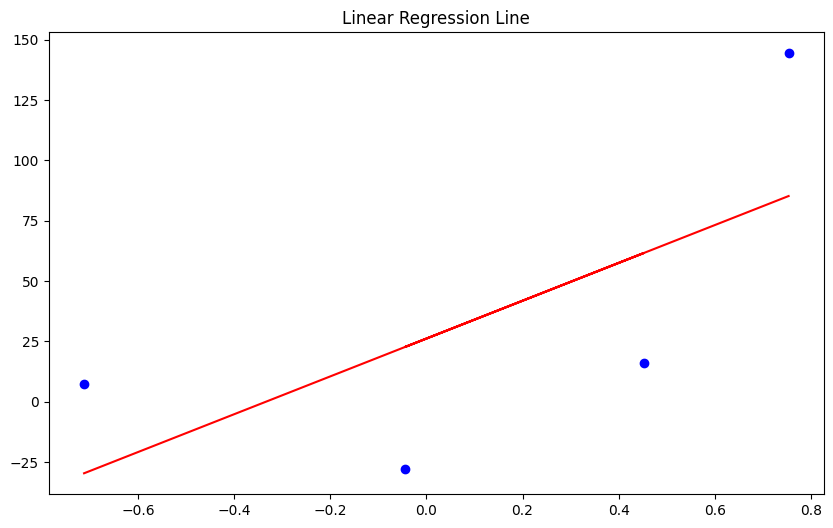

In [5]:
#plotting the regression line
plt.figure(figsize=(10,6))
plt.title("Linear Regression Line")
plt.scatter(X,y,color = 'blue', marker='o')
plt.plot(X, reg.predict(X), color= 'red')

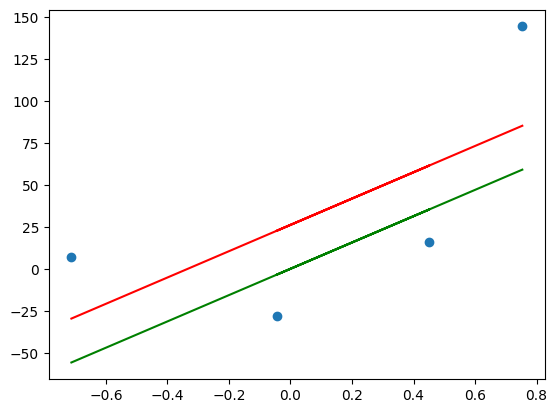

In [6]:
#let us assume the slope is fixed and b is equal to Zero
y_pred = (reg.coef_[0]*X + 0).reshape(4)
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color= 'red')
plt.plot(X,y_pred, color='green')


In [7]:
#Now lets implement samething using gradient descent for simple linear regression from scratch
m= reg.coef_[0]
b= 0 
loss_slope = -2* np.sum(y- m*X.ravel())
loss_slope


np.float64(-209.27706274506096)

In [8]:
learning_rate = 0.1
stepsize = learning_rate*loss_slope
stepsize

np.float64(-20.927706274506097)

In [9]:
b=b - stepsize
b

np.float64(20.927706274506097)

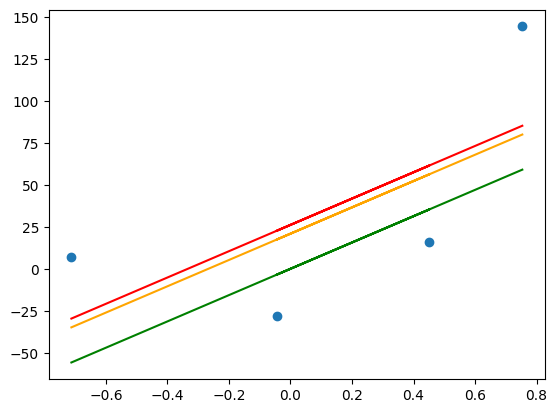

In [10]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color= 'red')
plt.plot(X, y_pred, color='green')
plt.plot(X, m *X+b, color='orange', label='Gradient Descent Line')


In [11]:
#Next iteration

loss_slope = -2 * np.sum(y-m*X.ravel() - b)
loss_slope

np.float64(-41.855412549012215)

In [12]:
stepsize = learning_rate*loss_slope
stepsize

np.float64(-4.185541254901222)

In [13]:
b = b - stepsize
b

np.float64(25.113247529407317)

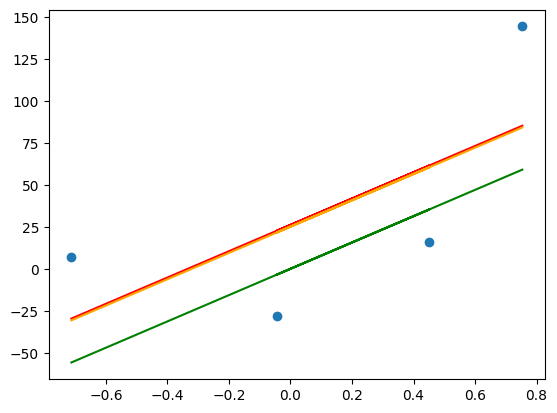

In [14]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color= 'red')
plt.plot(X, y_pred, color='green')
plt.plot(X, m *X+b, color='orange', label='Gradient Descent Line')

Updated Intercept:  25.95035578038756


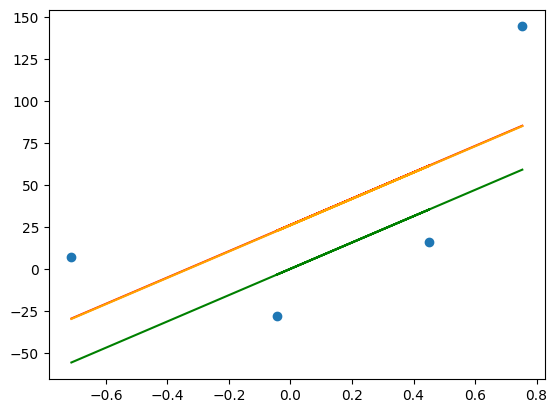

In [15]:
loss_slope = -2 * np.sum(y-m*X.ravel() - b)
loss_slope
stepsize = learning_rate*loss_slope
stepsize
b = b - stepsize
print("Updated Intercept: ", b)
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color= 'red')
plt.plot(X, y_pred, color='green')
plt.plot(X, m *X+b, color='orange')


In [16]:
#till now we have done 3 iterations, we can do this till the slope and intercept converges to the optimal values

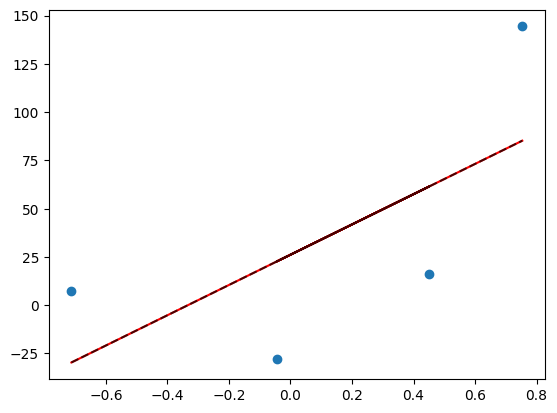

In [17]:
#Now lets do this in a loop
m= reg.coef_[0]
b = 0
learning_rate = 0.1
epoched = 100  # Number of iterations
for i in range(epoched):
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    stepsize = learning_rate * loss_slope
    b = b - stepsize
    y_pred = (m * X + b).reshape(4)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.plot(X, y_pred, color='black', alpha = 0.7, linestyle = '--')

In [18]:
#lets us calculate the intercept by definig a class for better flexibility and reusability
class GDRegressor:
    def __init__(self, learning_rate, epoches):
        self.lr = learning_rate
        self.epoches = epoches
        self.m = reg.coef_[0]  # Using the slope from the Linear Regression model
        self.b = 0  # Initializing b to a value, can be zero or any other value
    def fit(self,X,y):
        for i in range(self.epoches):
            loss_slope = -2 * np.sum(y -self.m*X.ravel()-self.b)
            self.b = self.b - (self.lr * loss_slope)
        print("Updated Intercept: ", self.b)
gd  = GDRegressor(0.01,1000)
gd.fit(X,y)

Updated Intercept:  26.159632843132602


In [ ]:
class GDRegressor:
    def __init__(self, learning_rate, epoches, m_init):
        self.lr = learning_rate
        self.epoches = epoches
        self.m = m_init  # Pass reg.coef_[0] or any initial value
        self.b = -10

    def fit(self, X, y):
        for _ in range(self.epoches):
            loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)
            stepsize = self.lr * loss_slope
            self.b = self.b - stepsize
        print("Updated Intercept: ", self.b)